# 기본설치

In [1038]:
! pip install folium
! pip install googlemaps
! pip install seaborn
! pip install pandas
import pandas as pd
import numpy as np
import folium
import googlemaps
import folium.plugins as plugins
%pwd

'C:\\Users\\SBAUser\\Jupyter_Python\\프로젝트 데이터분석'

#  출근시간 밀집도 그래프

## 19년도 , 21년도 밀집도 비교

In [683]:
import pandas as pd
import numpy as np
import folium
import googlemaps
import folium.plugins as plugins
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.figure(figsize=(100,50))
#글씨체 조정
font_path = 'C:\Windows\Fonts\Malgun.ttf'
fontname = fm.FontProperties(fname=font_path, size=18).get_name()
plt.rcParams['font.family']=fontname

<Figure size 10000x5000 with 0 Axes>

## 19년도 모든역 밀집도의 평균 리스트 뽑기

In [578]:
df19=pd.read_csv('서울교통공사_지하철혼잡도_191231.csv', encoding='euc-kr')

# 오전 10시까지만 자르기
df19v2=df19.iloc[:,0:15]
# 평일행만 남기기
df19v3=df19v2[df19v2['조사일자']=='평일']
# 오전 8시 기준 내림차순 정렬하기 ,  상위 100개만 남기기
df19v4=df19v3.sort_values(by='8시00분',ascending=False).head(100)
# 인덱스 0~99로 정렬 시키기
df19v5 = df19v4.reset_index(drop=True, inplace = False)
## 시간에 관련된 열만 추출한뒤에 object 타입 float로 변환하기
df19v5_time = df19v5.iloc[:,5:]
df19v5_time.columns
df19v5_time_float = df19v5_time.astype({'5시30분' : 'float', '6시00분' : 'float', '6시30분' : 'float', '7시00분' : 'float', '7시30분' : 'float',
                        '8시00분' : 'float', '8시30분' : 'float',
                        '9시00분'  : 'float' , '9시30분' : 'float', '10시00분' : 'float'})

# 실수형으로 데이터타입 바뀐지 확인
df19v5_time_float.info()
# 각 시간대별 혼잡도의 평균값 시리즈를 리스트로 전환하기
mean19_lst = df19v5_time_float.mean(numeric_only=True).to_list()
# df19v5 데이터프레임에 삽입할수 있도록 열 개수 늘리기
mean19_lst2 = ['','','','','혼잡도 평균'] + mean19_lst
# df19v5 데이터프레임에 삽입
df19v5.loc[100]= mean19_lst2 

df19v5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   5시30분   100 non-null    float64
 1   6시00분   100 non-null    float64
 2   6시30분   100 non-null    float64
 3   7시00분   100 non-null    float64
 4   7시30분   100 non-null    float64
 5   8시00분   100 non-null    float64
 6   8시30분   100 non-null    float64
 7   9시00분   100 non-null    float64
 8   9시30분   100 non-null    float64
 9   10시00분  100 non-null    float64
dtypes: float64(10)
memory usage: 7.9 KB


조사일자   호선   역번호         역명      구분   5시30분   6시00분   6시30분   7시00분  \
0     평일  7호선  2756        신중동      상선    34.7    25.3      41    63.3   
1     평일  7호선  2740      숭실대입구      상선      61    44.7    42.4    58.3   
2     평일  2호선   241         이대      내선    20.1    16.8    25.6    37.5   
3     평일  3호선   311        연신내      하선    21.1    26.4    35.2      52   
4     평일  3호선   324         금호      하선    33.3    34.6    34.4    51.2   
..   ...  ...   ...        ...     ...     ...     ...     ...     ...   
96    평일  5호선  2537  동대문역사문화공원      상선    17.9      21    25.9    43.1   
97    평일  2호선   232    구로디지털단지      외선    49.1    25.6    39.1      50   
98    평일  5호선  2538         청구      상선    16.3      20    26.5    40.2   
99    평일  7호선  2745         신풍      상선    55.7    32.5    30.8    41.3   
100                             혼잡도 평균  28.681  25.884  29.339  43.058   

      7시30분  8시00분   8시30분   9시00분   9시30분  10시00분  
0      82.6   99.9    68.5    53.8    34.6    34.7  
1      77.1   99.5    79.7    77.6    63.5    49.9  
2      58.3   99.3    86.5    52.9    43.4    31.9  
3      71.7   99.2    61.6    58.6    47.8    47.5  
4      60.4   98.7    75.3    71.5    55.7    50.1  
..      ...    ...     ...     ...     ...     ...  
96     56.9     74    58.5    46.5    44.7    32.8  
97     59.2   73.7    70.6    62.8    41.1    42.1  
98     54.3   73.6    58.8    52.3    49.8    37.5  
99     60.1   73.5    58.1    57.5    46.4    39.6  
100  59.523  82.51  66.713  56.474  46.638  36.914  

[101 rows x 15 columns]

## 21년도 밀집도 리스트 뽑기

In [577]:
#19년도와 같은방식으로 

df21=pd.read_csv('서울교통공사_지하철혼잡도_211231.csv',encoding='euc-kr')
df21v1=df21.iloc[:,:16]
df21v2=df21v1[df21v1['조사일자']=='평일']
df21v3=df21v2.sort_values(by='8시00분',ascending=False).head(100)
df21v4 = df21v3.iloc[:,1:]
df21v5 = df21v4.reset_index(drop = True , inplace = False ) 
mean21_lst = df21v5.iloc[:,5:].mean().to_list()# 시간별 혼잡도의 평균값을 리스트로 전환
mean21_lst2 = ['','','','','혼잡도 평균'] + mean21_list # 열 개수 맟추기
df21v5.loc[100]= mean21_list2 # 마지막행에 평균값 추가

In [996]:
df21v5

조사일자 호선   역번호      역명      구분   5시30분   6시00분   6시30분  7시00분  7시30분  \
0     평일  4   419   한성대입구      하선  43.700  35.300  44.200  65.20  95.00   
1     평일  4   418  성신여대입구      하선  54.900  34.200  42.900  69.00  95.50   
2     평일  4   420      혜화      하선  44.900  34.600  42.200  62.40  90.40   
3     평일  3   315     무악재      하선  35.400  33.200  45.200  65.40  96.20   
4     평일  4   417      길음      하선  52.700  29.800  42.000  65.70  88.30   
..   ... ..   ...     ...     ...     ...     ...     ...    ...    ...   
96    평일  5  2546     아차산      상선  24.800  23.200  41.000  48.90  63.60   
97    평일  5  2549      강동      상선  17.500  26.400  37.500  50.30  52.10   
98    평일  2   233      대림      내선  77.100  49.900  29.400  39.60  60.30   
99    평일  5  2520      신정      하선  25.300  20.100  28.300  47.40  62.90   
100                        혼잡도 평균  35.929  31.011  39.561  56.97  73.11   

       8시00분    8시30분   9시00분   9시30분  10시00분  
0    150.800  113.100  88.100  68.200  51.600  
1    150.600  106.900  85.800  64.100  50.200  
2    141.600  108.200  89.800  65.900  51.900  
3    140.600  114.000  76.400  53.400  47.000  
4    140.600   98.500  76.800  56.700  46.200  
..       ...      ...     ...     ...     ...  
96    85.600   70.500  61.200  49.300  37.400  
97    85.600   61.500  62.000  35.100  42.900  
98    85.500   59.100  47.300  29.900  19.100  
99    85.400   76.900  57.800  40.800  32.600  
100  106.867   86.869  70.651  51.834  39.909  

[101 rows x 15 columns]

## 가장 혼잡한 출근시간 확인

<function matplotlib.pyplot.show(close=None, block=None)>

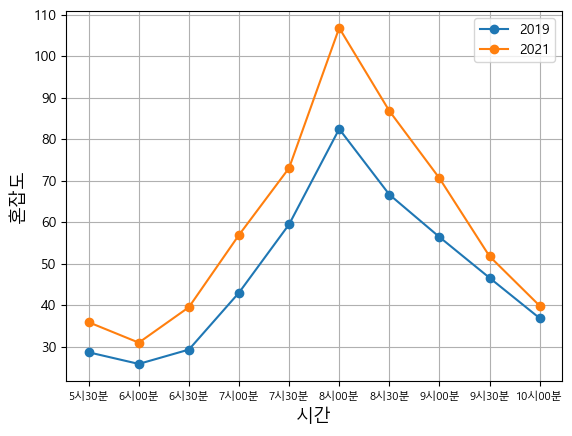

In [478]:
# x축은 df21.columns 에서 시간만 뽑아옴
x_columns = [ '5시30분', '6시00분', '6시30분', '7시00분',
       '7시30분', '8시00분', '8시30분', '9시00분', '9시30분', '10시00분']

x_values = x_columns
y_values_19 = mean19_lst
y_values_21 = mean21_lst

p19 = plt.plot(x_values,y_values_19,label='2019',marker='o')
p22 = plt.plot(x_values,y_values_21,label='2021',marker='o')

plt.xticks(size=8)
plt.xlabel('시간', size = 13)
plt.ylabel('혼잡도', size = 13)
plt.legend()
plt.grid()
plt.show

## 08시의 19년도 21년도 밀집도 비교그래프

In [755]:
df19=pd.read_csv('서울교통공사_지하철혼잡도_191231.csv', encoding='euc-kr')
df19['8시00분']
df19_weekday = df19[df19['조사일자']=='평일']
df19_8 = df19_weekday[['역명','구분','8시00분']]

In [732]:
df19_8v1 = df19_8.astype({'8시00분' : 'float'})

In [733]:
# 상 하선을 합쳐야 하는가?
df19_8v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 0 to 555
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   역명      556 non-null    object 
 1   구분      556 non-null    object 
 2   8시00분   556 non-null    float64
dtypes: float64(1), object(2)
memory usage: 17.4+ KB


In [1000]:
df19_8_de=df19_8v1.sort_values(by = '8시00분',ascending=False, inplace=False, ignore_index=True)
df19_8_50 = df19_8_de.head(50)
df19_x = df19_8_50['역명'].values
df19_y = df19_8_50['8시00분'].values
df21 = pd.read_csv('서울교통공사_지하철혼잡도_211231.csv', encoding='euc-kr')

df21_8 = df21[['조사일자','역명','구분','8시00분']]
df21_8_week = df21_8[ df21_8['조사일자']=='평일' ]
df21_8_de = df21_8_week.sort_values(by='8시00분',ascending = False  , ignore_index = True )

df21_8_50 = df21_8_de.head(50)

df21_x = df21_8_50['역명'].values
df21_x

df21_y = df21_8_50['8시00분'].values

<function matplotlib.pyplot.show(close=None, block=None)>

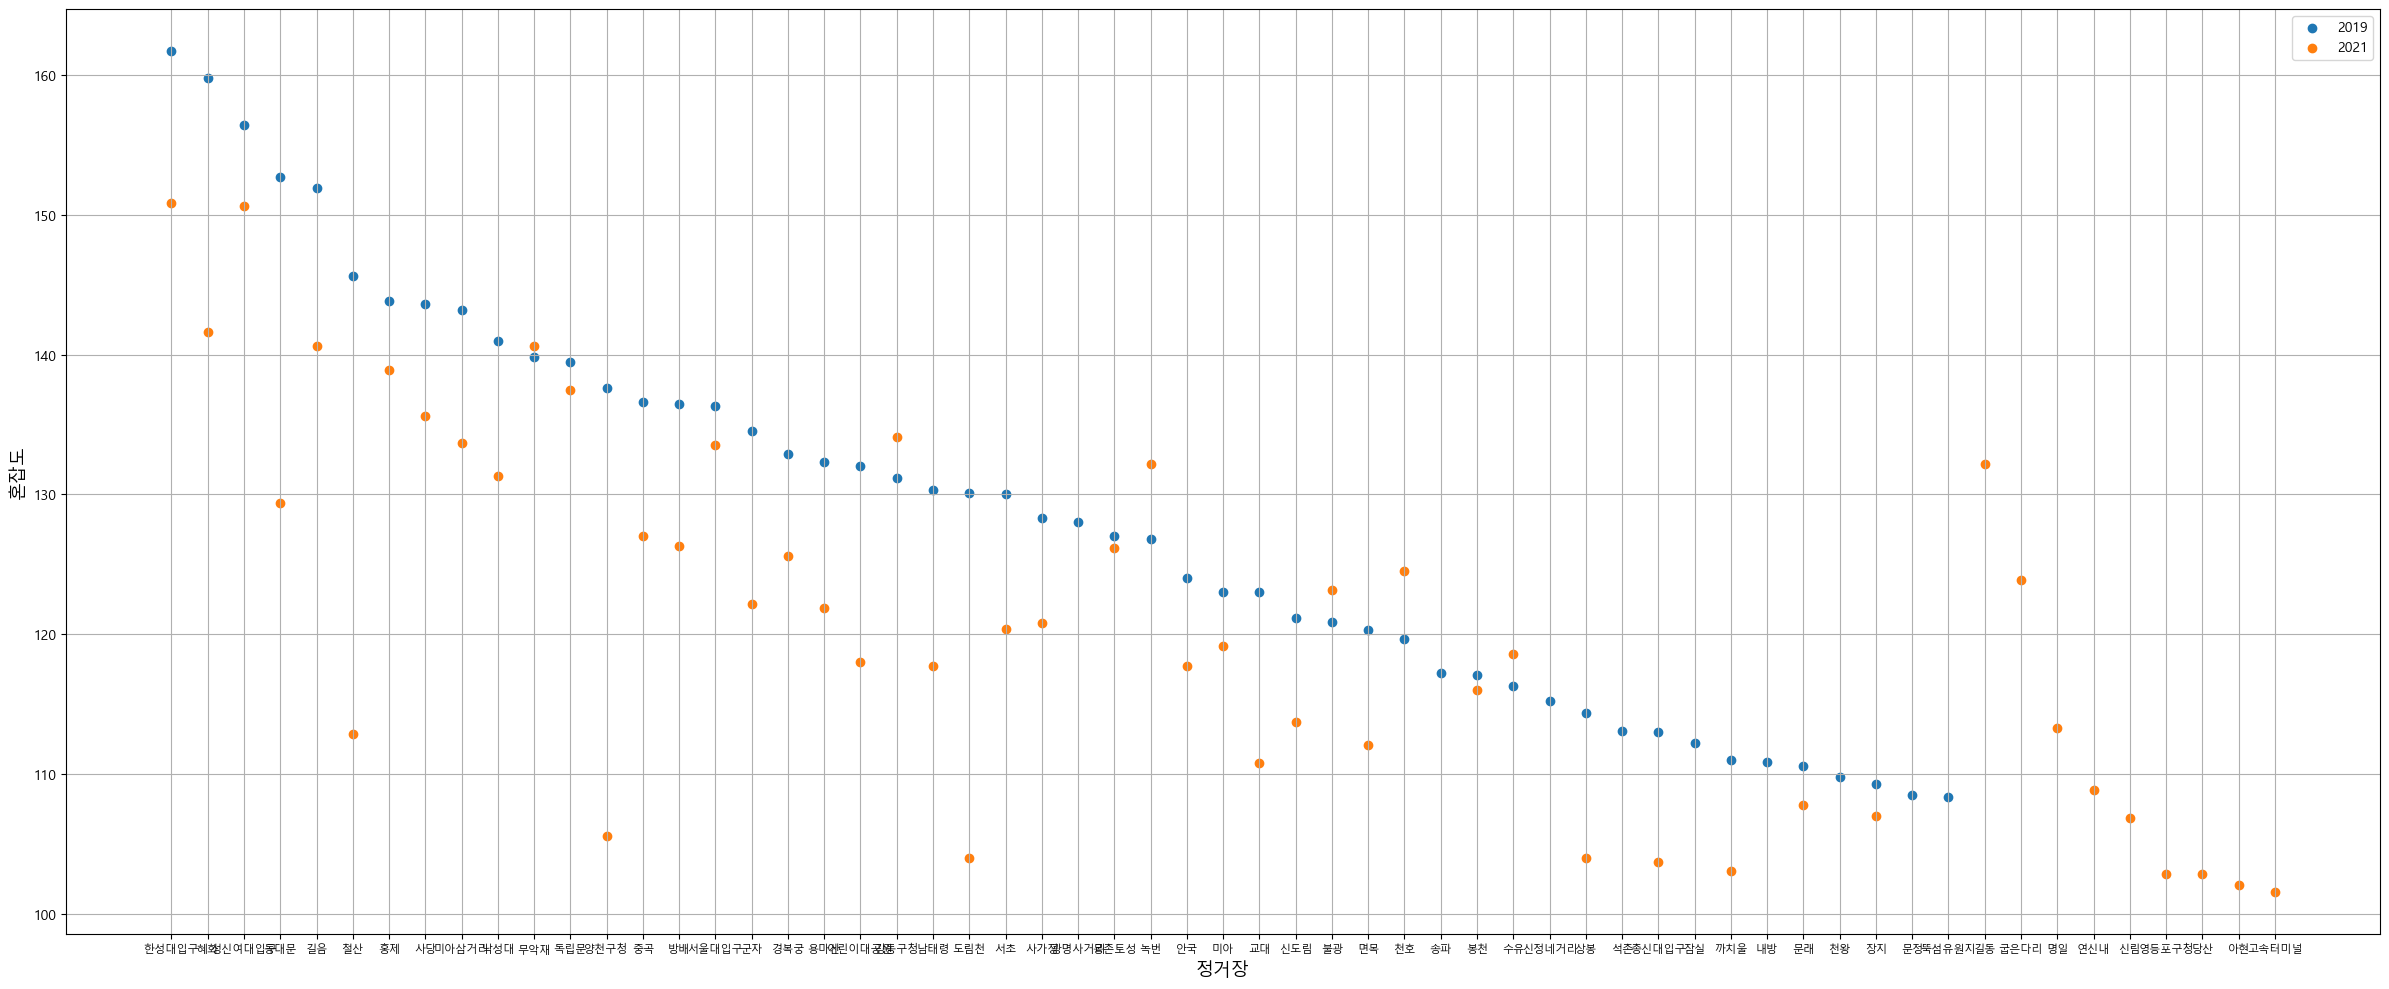

In [754]:
plt.figure(figsize = (24,10))

#l19 = plt.plot(df19_x, df19_y ,label='2019',marker='o')
#l21 = plt.plot(df21_x,df21_y,label='2021',marker='o')

plt.scatter(df19_x,df19_y, label='2019')
plt.scatter(df21_x,df21_y, label='2021')

plt.xlabel('정거장', size = 13)
plt.ylabel('혼잡도', size = 13)

plt.xticks(size=8)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show

# 코로나 이전 이후 지하철역 출근시간

## 파일불러오기, 필요없는 부분 삭제하기

In [1039]:
sp = pd.read_csv('서울시 지하철 호선별 역별 시간대별 승하차 인원 정보1205 (2).csv', encoding='euc-kr')

sp.columns[0:15]

sp2=sp.loc[:,['사용월', '호선명', '지하철역', '04시-05시 승차인원', '04시-05시 하차인원', '05시-06시 승차인원',
       '05시-06시 하차인원', '06시-07시 승차인원', '06시-07시 하차인원', '07시-08시 승차인원',
       '07시-08시 하차인원', '08시-09시 승차인원', '08시-09시 하차인원', '09시-10시 승차인원',
       '09시-10시 하차인원']]

sp3=sp2[sp2["사용월"] >= 201901] 
sp4=sp3[sp3["사용월"] <= 202112]
sp4

sp4=sp4.drop('04시-05시 승차인원',axis=1)

sp4=sp4.drop('04시-05시 하차인원',axis=1)

sp4.head()

사용월  호선명 지하철역  05시-06시 승차인원  05시-06시 하차인원  06시-07시 승차인원  \
6740  202112  1호선  동대문         12276          1913          8716   
6741  202112  1호선  동묘앞          2423           756          3270   
6742  202112  1호선  서울역          8460          6094         11185   
6743  202112  1호선   시청          1902          4537          2827   
6744  202112  1호선  신설동          7270          2738          7731   

      06시-07시 하차인원  07시-08시 승차인원  07시-08시 하차인원  08시-09시 승차인원  08시-09시 하차인원  \
6740          5492         13464         10014         18832         21879   
6741          3915          5412          7362          8890         18151   
6742         35735         34375         85455         55770        188733   
6743         19095          6322         56046          7816        168744   
6744         10318         15891         21124         24588         58444   

      09시-10시 승차인원  09시-10시 하차인원  
6740         16495         20889  
6741          7427         14958  
6742         43790        121596  
6743          8475         78172  
6744         16025         32087

## 승차총인원, 하차총인원 생성

In [1040]:
sp4['승차총인원']=(sp4['05시-06시 승차인원'])+(sp4['06시-07시 승차인원'])+(sp4['07시-08시 승차인원'])+(sp4['08시-09시 승차인원'])+(sp4['09시-10시 승차인원'])
sp4['하차총인원']=(sp4['05시-06시 하차인원'])+(sp4['06시-07시 하차인원'])+(sp4['07시-08시 하차인원'])+(sp4['08시-09시 하차인원'])+(sp4['09시-10시 하차인원'])

sp5=sp4.loc[:,['사용월','지하철역','승차총인원','하차총인원']]
sp5

사용월 지하철역   승차총인원   하차총인원
6740   202112  동대문   69783   60187
6741   202112  동묘앞   27422   45142
6742   202112  서울역  153580  437613
6743   202112   시청   27342  326594
6744   202112  신설동   71505  124711
...       ...  ...     ...     ...
28389  201901   원덕    4068    1034
28390  201901   중랑   75552   18168
28391  201901   지평     331     191
28392  201901   팔당    4254    6246
28393  201901   회기  224008  141308

[21654 rows x 4 columns]

## 승차 19,20,21년도 분리

In [1041]:
sp19=sp5.loc[sp['사용월']==201909]
sp19=sp19.sort_values(by='승차총인원',ascending=False).head(10)

sp20=sp5.loc[sp['사용월']== 202009 ]
sp20=sp20.sort_values(by='승차총인원',ascending=False).head(10)

sp21=sp5.loc[sp4['사용월']==202109]
sp21=sp21.sort_values(by='승차총인원',ascending=False).head(10)

In [761]:
sp21

사용월         지하철역   승차총인원   하차총인원
8604  202109           신림  675513  150571
8581  202109      구로디지털단지  427997  419967
8595  202109  서울대입구(관악구청)  403454  149890
8650  202109          연신내  379921   96179
8603  202109          신도림  357453  194580
8700  202109          까치산  352859   54347
8619  202109     잠실(송파구청)  351636  323137
8679  202109           쌍문  343889   67449
8742  202109           화곡  323283   67281
8676  202109     수유(강북구청)  322189  115127

### 그래프화

In [1042]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100,50))

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.figure(figsize=(100,50))

#글씨체 조정
font_path = 'C:\Windows\Fonts\Malgun.ttf'
fontname = fm.FontProperties(fname=font_path, size=18).get_name()
plt.rcParams['font.family']=fontname

plt.rcParams['axes.unicode_minus']=False

<Figure size 10000x5000 with 0 Axes>

<Figure size 10000x5000 with 0 Axes>

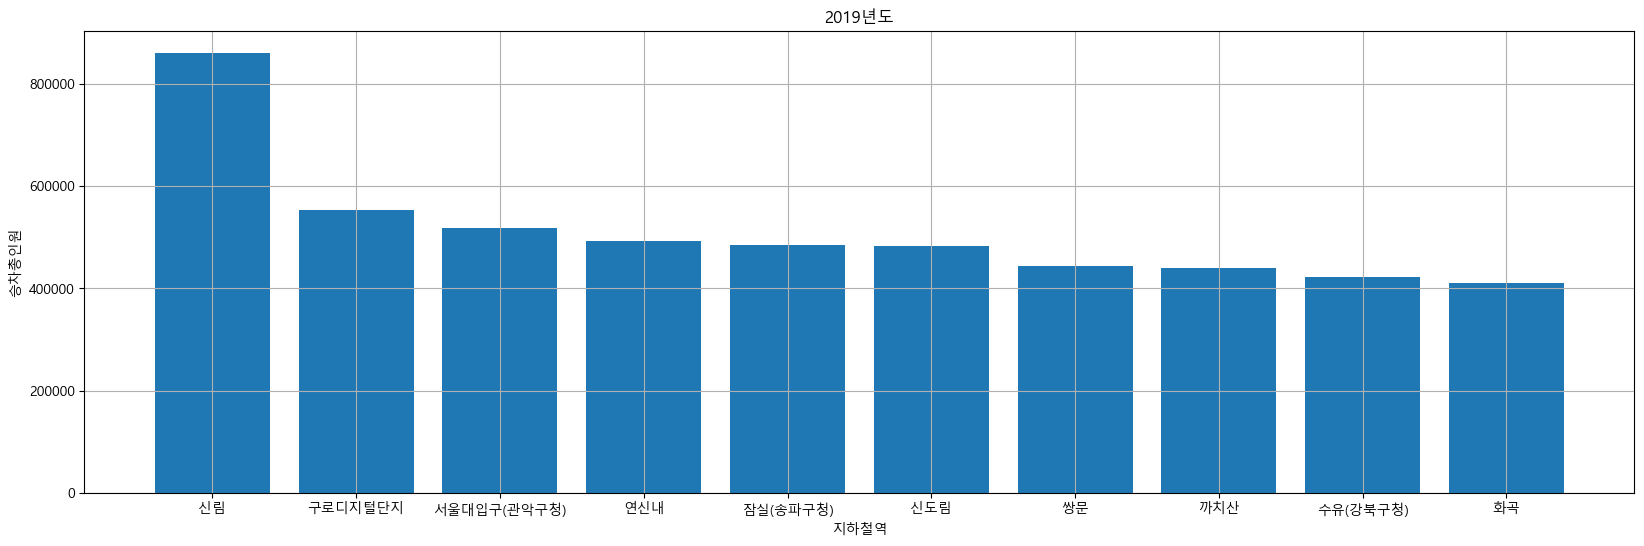

In [1043]:
plt.figure(figsize=(20,6))
plt.bar(sp19['지하철역'],sp19['승차총인원'])
plt.title('2019년도')
plt.xlabel('지하철역')
plt.ylabel('승차총인원')
plt.grid()
plt.show()

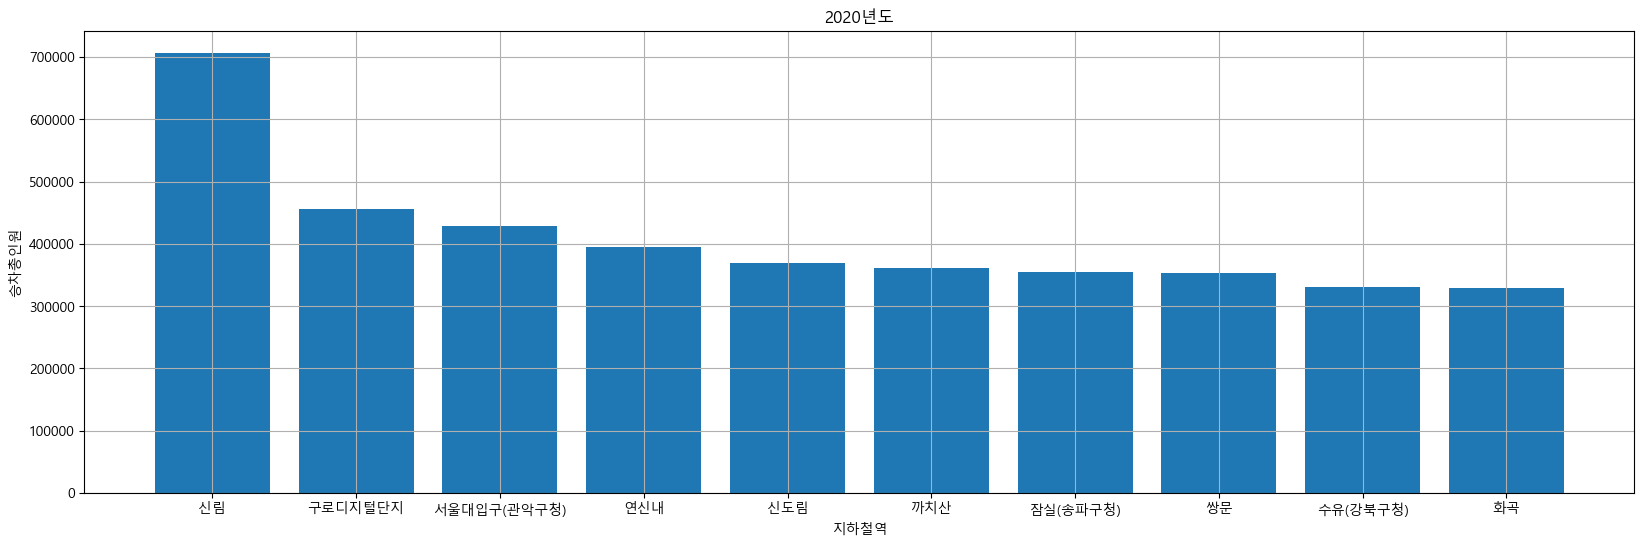

In [487]:
plt.figure(figsize=(20,6))
plt.bar(sp20['지하철역'],sp20['승차총인원'])
plt.title('2020년도')
plt.xlabel('지하철역')
plt.ylabel('승차총인원')
plt.grid()
plt.show()

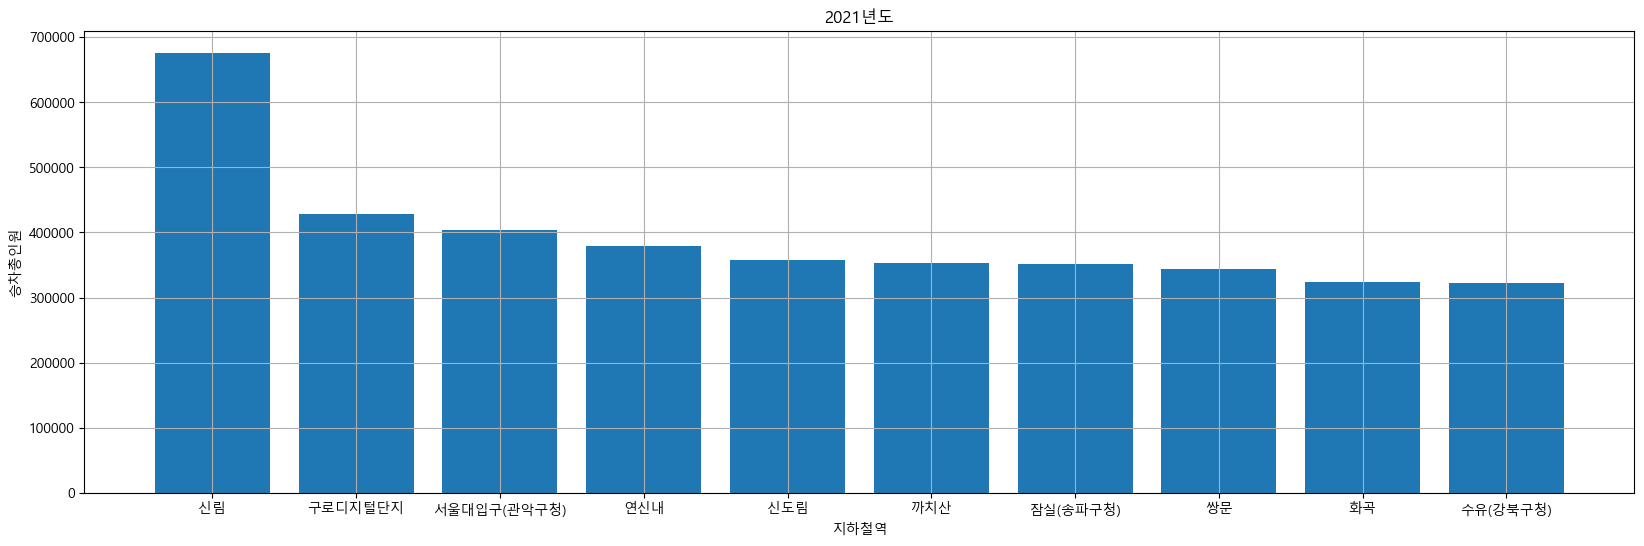

In [488]:
plt.figure(figsize=(20,6))
plt.bar(sp21['지하철역'],sp21['승차총인원'])
plt.title('2021년도')
plt.xlabel('지하철역')
plt.ylabel('승차총인원')
plt.grid()
plt.show()

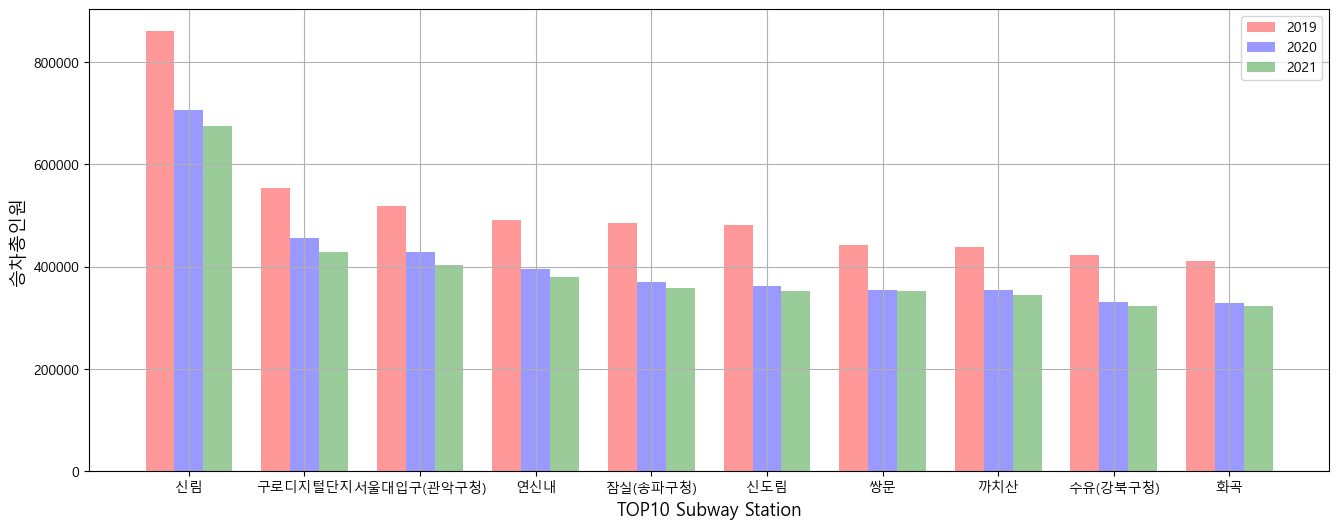

In [1044]:
# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(16,6))
bar_width = 0.25
# 상위 10개의 지하철이므로 10개의 배열을 만든다
x = np.arange(10)
# 각 역별로 3개의 승하차인원을 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(x, sp19['승차총인원'], bar_width, alpha=0.4, color='red', label='2019')
b2 = plt.bar(x + bar_width, sp20['승차총인원'], bar_width, alpha=0.4, color='blue', label='2020')
b3 = plt.bar(x + 2 * bar_width, sp21['승차총인원'], bar_width, alpha=0.4, color='green', label='2021')
# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 지하철역 정보와 매칭
subway_array = sp19['지하철역'].to_numpy()
plt.xticks(np.arange(bar_width, 10 + bar_width, 1), subway_array)
# x축, y축 이름 및 범례 설정
plt.xlabel('TOP10 Subway Station', size = 13)
plt.ylabel('승차총인원', size = 13)
plt.legend()
plt.grid()
plt.show()

### 분석결과

가장 많이 승차하는 구간은 : 4구간(신림,구로디지털단지,서울대입구,연신내)로 거의 고정이었으며, 나머지 6개(잠실,신도림,쌍문,까치산,수유,화곡)는 조금의 변동이 있었다.</br>
19년도에 비해 20,21년도는 역별로 10만명씩 승차인원이 줄었다 </br> 
왜 이런 결과가 나왔을까? </br>
인구분포도, 환승역 등

## 하차 19,20,21년도 분리

In [1045]:
sp19out=sp5.loc[sp['사용월']==201909]
sp19out=sp19out.sort_values(by='하차총인원',ascending=False).head(10)
sp19out

사용월         지하철역   승차총인원   하차총인원
23025  201909           강남  215596  891396
23058  201909           역삼   83506  754918
23041  201909     삼성(무역센터)   85022  747896
23224  201909      가산디지털단지   78314  685860
23045  201909           선릉  112420  654807
23065  201909        을지로입구   55440  629756
23021  201909           종각   42348  534997
23017  201909          서울역  206333  526459
23097  201909     양재(서초구청)  143743  518955
23142  201909  광화문(세종문화회관)   44011  504094

### 그래프화

In [1046]:
sp19out=sp5.loc[sp['사용월']==201909]
sp19out=sp19out.sort_values(by='하차총인원',ascending=False).head(10)
sp19out

sp20out=sp5.loc[sp['사용월']==202009]
sp20out=sp20out.sort_values(by='하차총인원',ascending=False).head(10)
sp20out

sp21out=sp5.loc[sp['사용월']==202109]
sp21out=sp21out.sort_values(by='하차총인원',ascending=False).head(10)
sp21out

사용월      지하철역   승차총인원   하차총인원
8577  202109        강남  137404  679530
8782  202109   가산디지털단지   66590  627231
8610  202109        역삼   59820  620519
8593  202109  삼성(무역센터)   54752  553314
8597  202109        선릉   76753  524588
8617  202109     을지로입구   33516  455338
8598  202109        성수   76267  433386
8581  202109   구로디지털단지  427997  419967
8649  202109  양재(서초구청)  108716  419115
8573  202109        종각   26298  363213

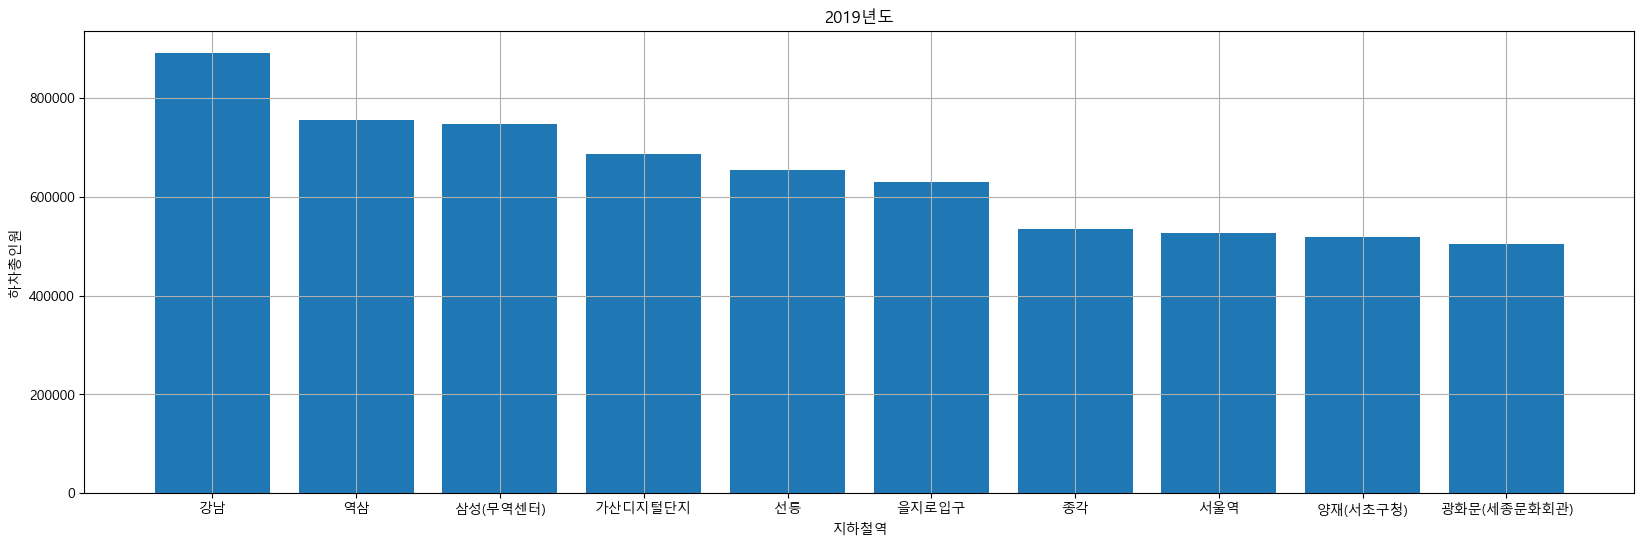

In [1047]:
plt.figure(figsize=(20,6))
plt.bar(sp19out['지하철역'],sp19out['하차총인원'])
plt.title('2019년도')
plt.xlabel('지하철역')
plt.ylabel('하차총인원')
plt.grid()
plt.show()

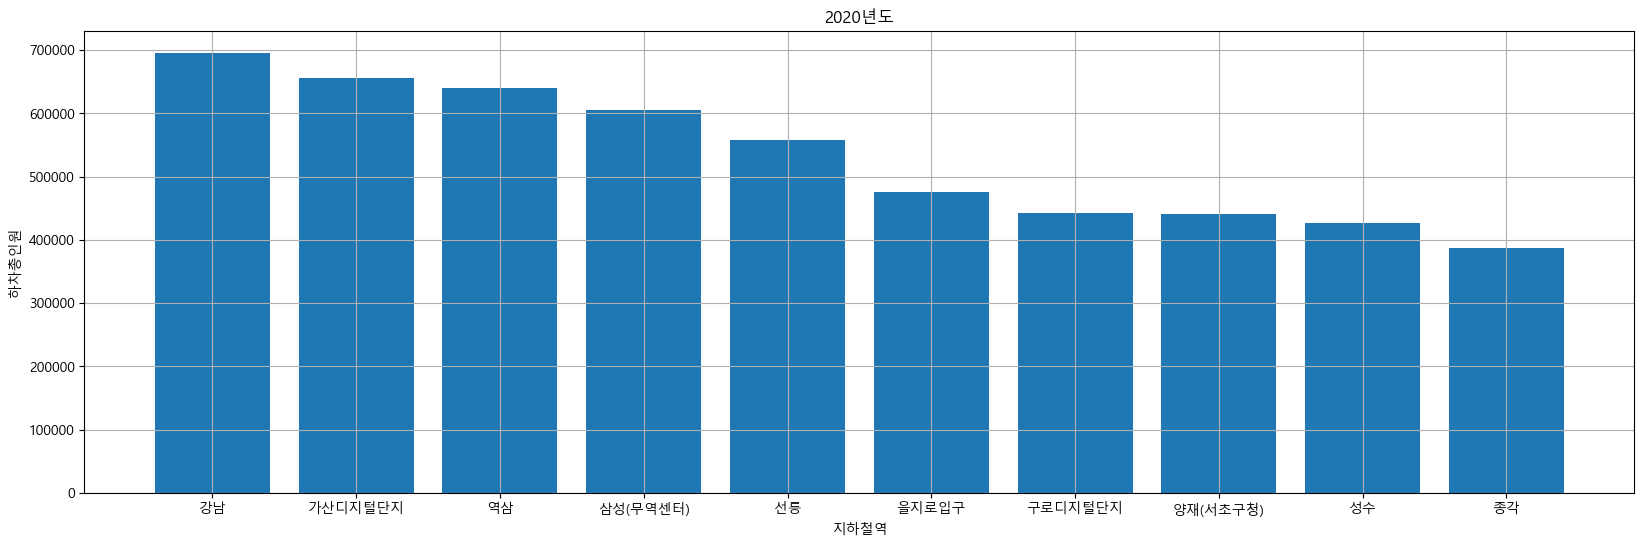

In [1048]:
plt.figure(figsize=(20,6))
plt.bar(sp20out['지하철역'],sp20out['하차총인원'])
plt.title('2020년도')
plt.xlabel('지하철역')
plt.ylabel('하차총인원')
plt.grid()
plt.show()

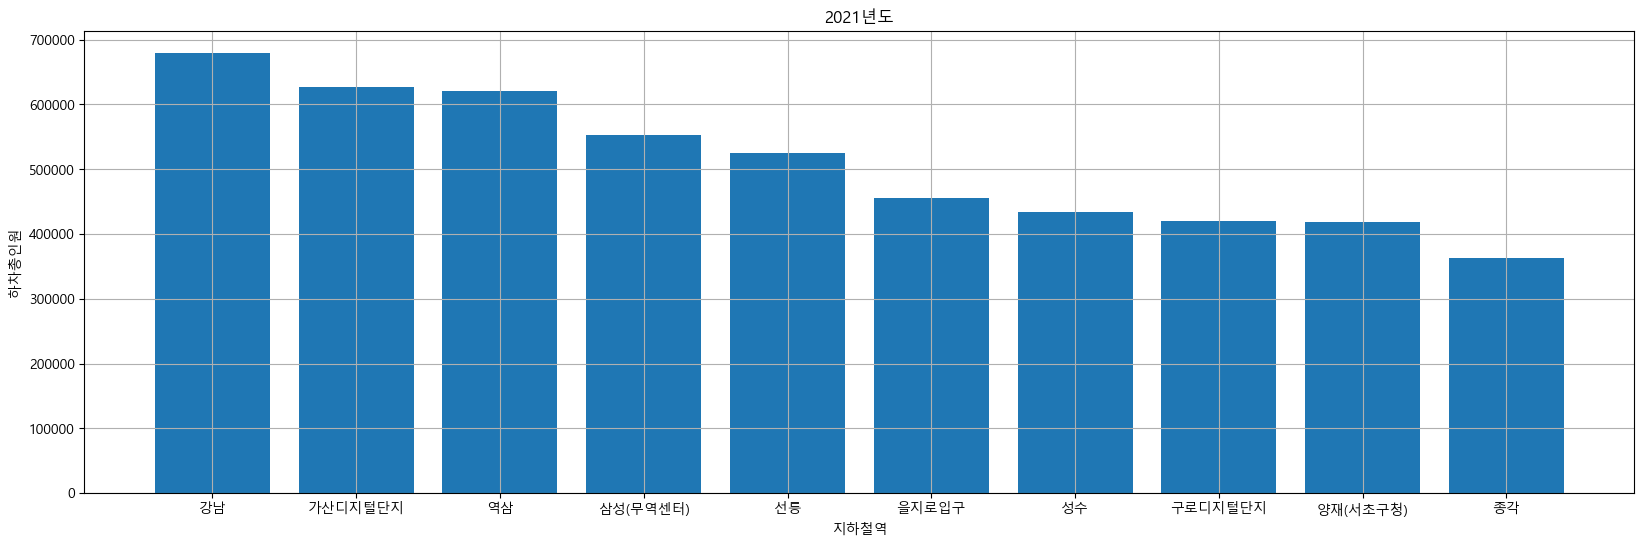

In [1049]:
plt.figure(figsize=(20,6))
plt.bar(sp21out['지하철역'],sp21out['하차총인원'])
plt.title('2021년도')
plt.xlabel('지하철역')
plt.ylabel('하차총인원')
plt.grid()
plt.show()

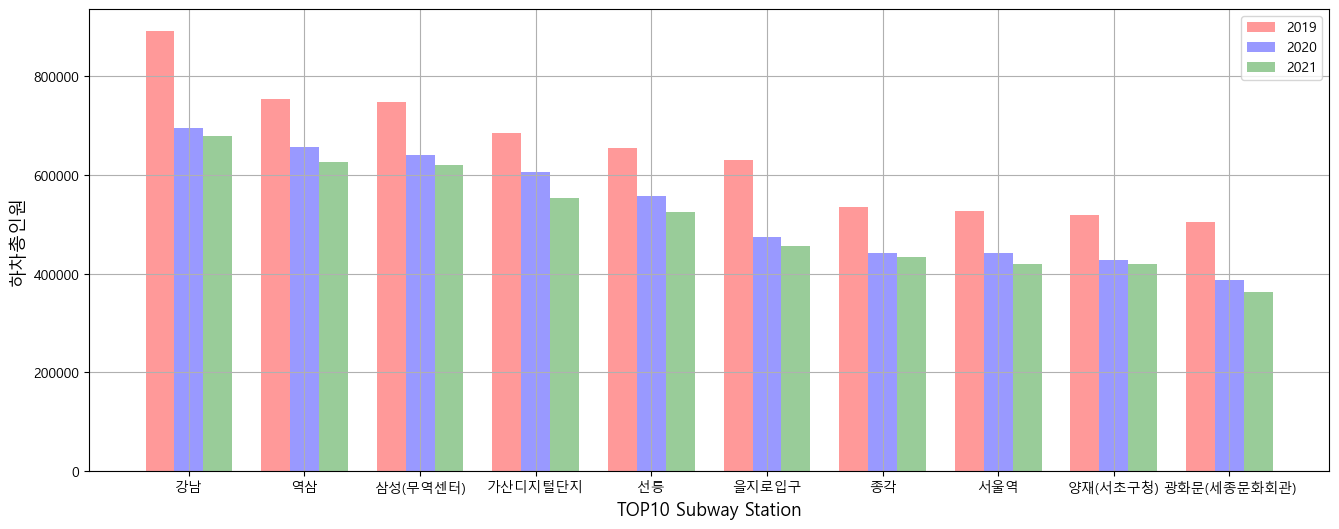

In [1050]:
# 하차총인원 top10
# 3:11
# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(16,6))
bar_width = 0.25
# 상위 10개의 지하철이므로 10개의 배열을 만든다
x = np.arange(10)
# 각 역별로 3개의 승하차인원을 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(x, sp19out['하차총인원'], bar_width, alpha=0.4, color='red', label='2019')
b2 = plt.bar(x + bar_width, sp20out['하차총인원'], bar_width, alpha=0.4, color='blue', label='2020')
b3 = plt.bar(x + 2 * bar_width, sp21out['하차총인원'], bar_width, alpha=0.4, color='green', label='2021')
# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 지하철역 정보와 매칭
# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 지하철역 정보와 매칭
subway_array = sp19out['지하철역'].to_numpy()
plt.xticks(np.arange(bar_width, 10 + bar_width, 1), subway_array)
# x축, y축 이름 및 범례 설정
plt.xlabel('TOP10 Subway Station', size = 13)
plt.ylabel('하차총인원', size = 13)
plt.legend()
plt.grid()
plt.show()

### 분석결과

(1) 19년도에 비해 20년도, 21년도 강남이 20만명이 줄어든 것에 비해 가산디지털단지는 3만명정도만 줄어든 것으로 파악된다.</br>
게다가 승차총인원, 하차총인원 둘다 많은 높은 것으로 보아서 </br>
이는 코로나로 인해 집에서 자택근무, 온라인수업이 늘어나며 , 컴퓨터부품판매업종이 바빠졌고, 이는 <b>컴퓨터 관련 수요</b> 가 늘어난것으로 파악된다. </br>
(2) 19년도에 비해 20년도, 21년도 서울역은 top10자리에서 밀려나게 되었다. 이는 여행수요의 감소가 원인인 것으로 추측된다. </br>
(3) 19년도에 비해 20년도, 21년도 종각역은 10위로 밀어나게 되었다. 이는 종각 부근의 경제침체화로 이뤄졌다. (부동산 가격비교를 써봐도 괜찮을듯) </br> 

# 최종결과 1 : 밀집도, 승하차인원 맵핑

지하철 신설시 몰려있는부분을 중점적으로 만들필요가 있겠다.

In [875]:
! pip install pandas
import pandas as pd
import folium

In [876]:
df21_8_de['역명'].head(20)

0      한성대입구
1     성신여대입구
2         혜화
3        무악재
4         길음
5         홍제
6        독립문
7         사당
8       강동구청
9      미아삼거리
10     서울대입구
11        길동
12        녹번
13       낙성대
14       동대문
15        중곡
16        방배
17      몽촌토성
18       경복궁
19        천호
Name: 역명, dtype: object

In [877]:
dfmapseoulin= pd.DataFrame({'ID':['신림','구로디지털단지','서울대입구(관악구청)','연신내','신도림','까치산','잠실(송파구청)','쌍문','화곡','수유(강북구청)'],
                             '위도':['37.4842644294274','37.4852533671941','37.4812845008265','37.6191924317614','37.5089048744726','37.5322270449167','37.5133092702048','37.6485317952362','37.5416435540232','37.6378664771973'],
                             '경도':['126.929740854865','126.901473089504','126.952695107942','126.921096185129','126.891307981962','126.846426169396','127.100215181119','127.034651559958','126.840432411284','127.025492107399']})

dfmapseoulout= pd.DataFrame({'ID':['강남','가산다지털단지','역삼','삼성(무역센터)','선릉','을지로입구','성수','구로디지털단지','양재(서초구청)','종각'],
                             '위도':[' 37.498095', '37.4803887400743', '37.5006600052986','37.5088119293814','37.5044937750958','37.5660229020616','37.5445852156774','37.4852533671941','37.4845687081114','37.5702216815202'],
                             '경도':['127.027610', '126.882643680055', '127.036460414211','127.063020940329','127.048948120105','126.982183995362','127.056057944077','126.901473089504','127.034146039501','126.983133839231']})

dfmapseoulout['위도'].astype(float)
dfmapseoulout['경도'].astype(float)

dfmapseoul_density= pd.DataFrame({'ID':['한성대입구','성신여대입구','혜화','무악재','길음','홍제','독립문','사당','강동구청','미아삼거리','서울대입구','길동','녹번','낙성대','동대문','중곡','방배','몽촌토성','경복궁','천호'],
                             '위도':['37.5884047925683','37.5929627242628','37.5820258983338','37.5825560184073','37.6033767646759','37.5887881726718','37.5744680801684','37.4765532208396','37.530193178362','37.6132684542852','37.4812845008265','37.5378120875517','37.6008031568325','37.4770896313732','37.5716640012581','37.5658680402426','37.4814561264392','37.5178028959182','37.5757880985498','37.5384968055586'],
                             '경도':['127.006000831773','127.017120398018','127.00192463086','126.950230958933','127.025049999193','126.944158013369','126.957911446269','126.981549541445','127.120443701344','127.030082101855','126.952695107942','127.140007691428','126.935814422277','126.963505817942','127.010617962363','127.084257974673','126.997535255649','127.112844983956','126.973668718282','127.123919374783']})

In [1051]:
import folium
center = [37.541, 126.986]
m = folium.Map(location=center,tiles='cartodbpositron', zoom_start=10)

# 1000 개의 데이터만 그려냅니다.
for i in range(0,10):
    folium.Circle(
        location = dfmapseoulout.loc[i, ['위도', '경도']].values.tolist(),
        radius = 300,
        fill_color='blue'
    ).add_to(m)

for i in range(0,10):
    folium.Circle(
        location = dfmapseoulin.loc[i, ['위도', '경도']].values.tolist(),
        radius = 300,
        color='red',
        fill_color='red'
    ).add_to(m)
    
for i in range(0,20):
    folium.Circle(
        location = dfmapseoul_density.loc[i, ['위도', '경도']].values.tolist(),
        radius = 300,
        color='green',
        fill_color='green'
        
    ).add_to(m)

m
# 빨간건 승차, 파란건 하차, 초록색은 혼잡도

# 서울역 승하차 인원과 서울방문객수의 비교

## 서울방문객수 자료 불러오기

In [1052]:
travel=pd.read_csv('서울방문자수_년도별.CSV',encoding='euc-kr')  # https://datalab.visitkorea.or.kr/datalab/portal/main/getMainForm.do 한국관광데이터랩.

## 승하차 총합

In [1053]:
sp.head()

spseoul=sp.loc[sp['지하철역']=='서울역']

spseoul=spseoul[spseoul["사용월"] >= 201901] 
spseoul=spseoul[spseoul["사용월"] <= 202112]
spseoul=spseoul.drop('작업일자', axis=1)

spseoul2=spseoul.groupby('사용월').sum()
spseoul2

spseoul2['총합']=spseoul2.sum(axis=1)

spseoul2

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_15836\294482663.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  spseoul2=spseoul.groupby('사용월').sum()


04시-05시 승차인원  04시-05시 하차인원  05시-06시 승차인원  05시-06시 하차인원  06시-07시 승차인원  \
사용월                                                                            
201901          1433            28         21470         11135         27481   
201902          1375            24         17680          9325         22810   
201903          1596            40         22845         11585         28876   
201904          1462            31         22676         12617         30276   
201905          1623            35         24163         13524         31344   
201906          1543            35         23479         12716         29358   
201907          1515            42         23717         12376         29716   
201908          1411            39         23817         12503         29437   
201909          1326            22         22235         11752         27508   
201910          1491            15         25521         13292         31165   
201911          1359            33         23967         12130         29234   
201912          1394            25         22506         11728         27791   
202001          1283            26         20048         10801         26831   
202002          1029            19         17758          7753         21765   
202003           933            12         14779          6218         16759   
202004           916            18         14596          6563         16435   
202005          1025            24         15396          7212         18074   
202006           948            27         16641          7642         19729   
202007           991            18         16569          7934         20602   
202008           879            20         14718          7326         17828   
202009           915            11         15491          6711         16863   
202010           974            21         15953          7267         18025   
202011           993            13         15526          7239         18541   
202012           772            15         13932          6064         16052   
202101           645            12         12207          5834         15331   
202102           612            14         11647          5534         14261   
202103           888            23         15876          7003         18823   
202104           971            19         15806          7291         19529   
202105           858            22         15495          7403         19564   
202106           880            22         16063          7852         20783   
202107           892             8         15209          7599         19839   
202108           716            12         14128          6860         18754   
202109           748            20         13334          7162         17957   
202110           884             8         15478          7889         19371   
202111           933            17         16038          8597         20909   
202112          1037            23         15412          7417         19575   

        06시-07시 하차인원  07시-08시 승차인원  07시-08시 하차인원  08시-09시 승차인원  08시-09시 하차인원  \
사용월                                                                            
201901         77332         72986        179309        137378        418160   
201902         67572         63029        147962        120358        340470   
201903         88513         78433        182381        145993        410391   
201904        102705         85284        200714        154437        447358   
201905        106547         84877        199620        155208        435329   
201906         96255         78031        179782        140031        392103   
201907         92669         81177        195501        151147        453792   
201908         93453         79848        187392        139085        406549   
201909         90086         79651        179079        140594        389309   
201910        113701         87948        200290        157041        432584   
201911 

### 2019년 총합

In [1054]:
spseoul2019 =spseoul2.head(12)
spseoul2019['총합'].sum(axis=0)  #2019년 총합

69888828

### 2020년 총합

In [1055]:
spseoul2020a=spseoul[spseoul['사용월']>=202001]
spseoul2020=spseoul2020a[spseoul2020a['사용월']<=202012]

spseoul2020['총합']=0
spseoul2020['총합']=spseoul.sum(axis=1)
spseoul2020['총합'].sum(axis=0) 
spseoul2020

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_15836\946204901.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spseoul2020['총합']=0
C:\Users\SBAUser\AppData\Local\Temp\ipykernel_15836\946204901.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  spseoul2020['총합']=spseoul.sum(axis=1)
C:\Users\SBAUser\AppData\Local\Temp\ipykernel_15836\946204901.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

사용월       호선명 지하철역  04시-05시 승차인원  04시-05시 하차인원  05시-06시 승차인원  \
14029  202012       1호선  서울역           581            11          8010   
14134  202012       4호선  서울역           118             3          3486   
14372  202012       경부선  서울역             1             0            35   
14437  202012       경의선  서울역             1             0           724   
14498  202012  공항철도 1호선  서울역            71             1          1677   
...       ...       ...  ...           ...           ...           ...   
20733  202001       4호선  서울역           275             5          5028   
20969  202001       경부선  서울역             2             3            51   
21035  202001       경의선  서울역             0             0           660   
21036  202001       경의선  서울역             0             0             0   
21097  202001  공항철도 1호선  서울역            98             0          5361   

       05시-06시 하차인원  06시-07시 승차인원  06시-07시 하차인원  07시-08시 승차인원  ...  \
14029          5042          9302         25859         27028  ...   
14134           422          4467          6913          9738  ...   
14372           150            35          1337          5561  ...   
14437             9           735          4817          2038  ...   
14498           441          1513          5369          6700  ...   
...             ...           ...           ...           ...  ...   
20733           911          6520         15220         11764  ...   
20969           311            80          2071          8314  ...   
21035            11           734          5878          1804  ...   
21036             0             0             0             0  ...   
21097          1628          6351         12615         13953  ...   

       23시-24시 하차인원  00시-01시 승차인원  00시-01시 하차인원  01시-02시 승차인원  01시-02시 하차인원  \
14029          3737            15           326             4             4   
14134          1895             2           603             0             0   
14372           101            12             9             0             0   
14437           527             0            32             0             0   
14498           844             1           516             0             0   
...             ...           ...           ...           ...           ...   
20733         12370           901          4448            35           522   
20969           388          1115            36             7             1   
21035          1236            11           157             1             0   
21036             0             0             0             0             0   
21097          5436           615          3317            22            53   

       02시-03시 승차인원  02시-03시 하차인원  03시-04시 승차인원  03시-04시 하차인원       총합  
14029             0             1             0             0  1841904  
14134             0             0             0             0   716030  
14372             0             0             0             0   330241  
14437             0             0             0             0   375931  
14498             0             0             0             0   475211  
...             ...           ...           ...           ...      ...  
20733             0             5             0             0  1268113  
20969             0             0             0             0   473940  
21035             0             0             0             0   457277  
21036             0             0             0             0   202009  
21097             0             0             0             0   983136  

[65 rows x 52 columns]

### 2021년 총합

In [1056]:
spseoul2021 =spseoul2.tail(12)
spseoul2021['총합'].sum(axis=0) 

41783872

### 19~21년 데이터 총합 만들기

In [1057]:
! pip install pandas
import pandas as pd
from pandas import Series, DataFrame

In [1058]:
sptotal2=DataFrame({'2019년도':[spseoul2019['총합'].sum(axis=0)],'2020년도':[spseoul2020['총합'].sum(axis=0)],'2021년도':[spseoul2021['총합'].sum(axis=0)]},index=['서울시방문자수'])
sptotal2

2019년도    2020년도    2021년도
서울시방문자수  69888828  55488931  41783872

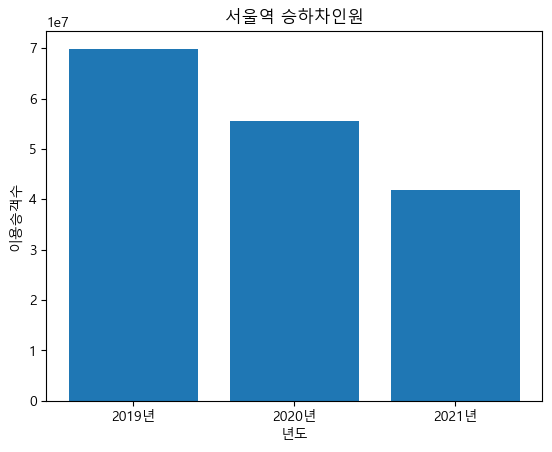

In [1059]:
x = np.arange(3)
years = ['2019년', '2020년', '2021년']
values = [69888828, 55488931, 41783872]

plt.bar(x, values)
plt.xticks(x, years)

plt.title('서울역 승하차인원')
plt.xlabel('년도')
plt.ylabel('이용승객수')
plt.show()

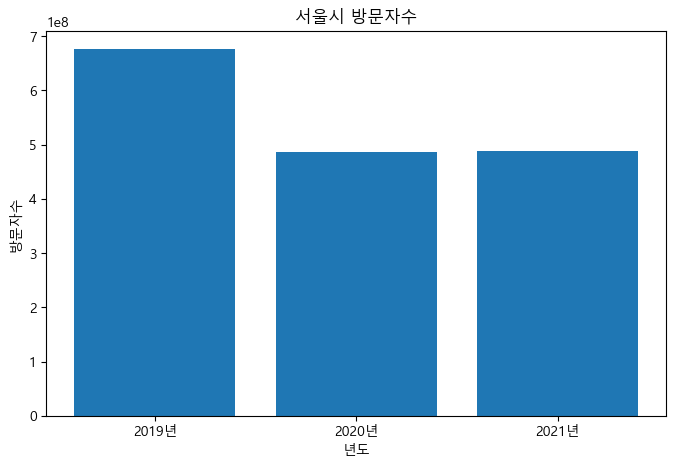

In [1060]:
plt.figure(figsize=(8,5))
plt.bar(['2019년', '2020년', '2021년'],[676239448, 486063680, 487463395])
plt.title('서울시 방문자수')
plt.xlabel('년도')
plt.ylabel('방문자수')
plt.show()

같은 우하향 그래프를 보여주고 있다.

서울시 방문자수가 많이 줄었는데 원인이 무엇일까?

In [1061]:
corr=np.corrcoef([676239448, 486063680, 487463395],[69888828, 55488931, 41783872])
corr

array([[1.        , 0.86993618],
       [0.86993618, 1.        ]])

상관계수가 0.86은 높은 지수에 속한다.

# 2021년 종합 데이터 상관행렬

## 2021년 승하차 총인원 

### 승차인원

In [1062]:
in_subway= sp.columns.tolist()[:3]
for a in sp.columns.tolist():
    if a.find('승차')!= -1 :
        in_subway.append(a)

in_subway_df = sp[in_subway]

In [1063]:
in_subway_df2021a=in_subway_df.loc[(in_subway_df["사용월"]) >= 202101]
in_subway_df2021=in_subway_df2021a.loc[(in_subway_df["사용월"]) <= 202112]

in_subway_df2021['총승차인원']=in_subway_df2021.iloc[:,3:].sum(axis=1)

subway21in=in_subway_df2021[['사용월','총승차인원']]
subway21in

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_15836\3740987535.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_subway_df2021['총승차인원']=in_subway_df2021.iloc[:,3:].sum(axis=1)


사용월    총승차인원
6740   202112   308782
6741   202112   235271
6742   202112  1182429
6743   202112   570037
6744   202112   362626
...       ...      ...
14022  202101     6521
14023  202101   121285
14024  202101     1109
14025  202101    22064
14026  202101   495183

[7287 rows x 2 columns]

In [1064]:
subin21=subway21in.groupby(['사용월']).sum()
subin21=subin21.reset_index()

In [990]:
subin21.to_csv('2021년월별승차총인원2.csv',index=False)

### 하차인원

In [982]:
in_subway= sp.columns.tolist()[:3]
for a in sp.columns.tolist():
    if a.find('하차')!= -1 :
        in_subway.append(a)

in_subway_df = sp[in_subway]
in_subway_df

사용월  호선명 지하철역  04시-05시 하차인원  05시-06시 하차인원  06시-07시 하차인원  \
0      202211  1호선  동대문             4          1871          6391   
1      202211  1호선  동묘앞             4          1052          4674   
2      202211  1호선  서울역            24          8662         49665   
3      202211  1호선   시청             0          4369         23225   
4      202211  1호선  신설동            15          2278          8707   
...       ...  ...  ...           ...           ...           ...   
55721  201501  중앙선  운길산             0            56           403   
55722  201501  중앙선   원덕             0             4            46   
55723  201501  중앙선   중랑             1           424          2084   
55724  201501  중앙선   팔당             0            50           149   
55725  201501  중앙선   회기             3          3067         10430   

       07시-08시 하차인원  08시-09시 하차인원  09시-10시 하차인원  10시-11시 하차인원  ...  \
0             11493         21825         22349         22100  ...   
1              8851         21633         18442         20527  ...   
2            109445        219435        160791         81565  ...   
3             68121        195016        101983         45320  ...   
4             24027         57914         33623         21667  ...   
...             ...           ...           ...           ...  ...   
55721           675          1390          3270          3673  ...   
55722           248           344           273           497  ...   
55723          3027          6573          6133          5605  ...   
55724           523          1151          2931          3932  ...   
55725         24473         59383         41911         35003  ...   

       18시-19시 하차인원  19시-20시 하차인원  20시-21시 하차인원  21시-22시 하차인원  22시-23시 하차인원  \
0             20137         19091         12598         10865          9671   
1              9948          7514          5419          5452          5716   
2             97723         64928         45433         40098         28157   
3             27858         12939          8135          7653          5318   
4             30189         20965         13846         13169         11142   
...             ...           ...           ...           ...           ...   
55721          1218          1457           769           760           775   
55722           721           714           612           404           339   
55723         19547         21424         14362         11678         11060   
55724           822           749           320           319           339   
55725         76039         81870         53481         50706         49658   

       23시-24시 하차인원  00시-01시 하차인원  01시-02시 하차인원  02시-03시 하차인원  03시-04시 하차인원  
0              7946          2191           206             1             0  
1              3580          1322           332             1             0  
2             13413          2639           192             0             0  
3              3194           850            26             0             0  
4              7874          2070             6             0             0  
...             ...           ...           ...           ...           ...  
55721           633           222             0             0             0  
55722           383           157             0             0             0  
55723          6501          1617             0             0             0  
55724           336            85             0             0             0  
55725         35702          9314             0             0             0  

[55726 rows x 27 columns]

In [984]:
in_subway_df2021a=in_subway_df.loc[(in_subway_df["사용월"]) >= 202101]
in_subway_df2021=in_subway_df2021a.loc[(in_subway_df["사용월"]) <= 202112]
in_subway_df2021['총하차인원']=in_subway_df2021.iloc[:,3:].sum(axis=1)

subway21out=in_subway_df2021[['사용월','총하차인원']]

subout21=subway21out.groupby(['사용월']).sum()
subout21=subout21.reset_index()
subout21=subout21.set_index('사용월')

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_15836\1133504057.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_subway_df2021['총하차인원']=in_subway_df2021.iloc[:,3:].sum(axis=1)


In [985]:
subout21.to_csv('2021년월별하차총인원2.csv', index=False)

'C:\\Users\\SBAUser\\Jupyter_Python\\프로젝트 데이터분석'

## 종합 데이터 상관행렬

In [1012]:
import pandas as pd
import numpy as np

import seaborn as sns

import folium
import googlemaps
import folium.plugins as plugins

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [1013]:
font_path = 'C:\Windows\Fonts\Malgun.ttf'
fontname = fm.FontProperties(fname=font_path, size=18).get_name()
plt.rcParams['font.family']=fontname

In [1066]:
# 데이터 불러오기
df21_corona = pd.read_csv('서울시 코로나19 확진자 발생동향_1208.csv',encoding ='euc-kr')
df21_visit = pd.read_csv('2021 서울 방문자수.csv',encoding ='euc-kr')
df21_in= pd.read_csv('2021년월별승차총인원2.csv', encoding ='utf-8')
df21_out = pd.read_csv('2021년월별하차총인원2.csv',encoding ='utf-8')
df21_oil = pd.read_csv('국제유가_도입현황_2021.csv',encoding='euc-kr')

In [1067]:
df21_corona

서울시 기준일  서울시 추가 확진
0    2021-01-01        359
1    2021-01-02        251
2    2021-01-03        197
3    2021-01-04        329
4    2021-01-05        199
..          ...        ...
360  2021-12-27       1917
361  2021-12-28       1496
362  2021-12-29       1290
363  2021-12-30       1915
364  2021-12-31       1722

[365 rows x 2 columns]

In [1068]:
# 날짜의 데이터 타입을 datatime64로 바꾸기
df21_corona['datetime'] = df21_corona['서울시 기준일'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

In [1069]:
df21_corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   서울시 기준일    365 non-null    object        
 1   서울시 추가 확진  365 non-null    int64         
 2   datetime   365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 8.7+ KB


In [1070]:
# 날짜를 인덱스로 집어넣기
df21_corona.set_index(df21_corona['datetime'], inplace=True)

# 필요한 확진자수 열만 뽑기
df21_coronav1 = df21_corona[['서울시 추가 확진']]

# 일별 데이터를 월별 데이터로 변환후 일별데이터 합 출력하기
df21 = df21_coronav1.resample(rule = 'M').sum()

## 원유 데이터 정리하기

In [1071]:
df21_oil.drop(labels= '기준원유',axis=1, inplace=True)

In [1028]:
df21_oil

항목  2021.01  2021.02  2021.03  2021.04  2021.05  2021.06  \
0  국제유가(Dubai) (US$/배럴)      NaN     60.9     66.4     62.9     66.3     71.6   
1         도입단가 (US$/배럴)    54.82     56.3     62.5     64.9     65.8     68.9   
2           도입물량 (백만배럴)      NaN     75.0     71.9     83.4     81.0     80.2   

   2021.07  2021.08  2021.09  ...  2021.12  2022.01  2022.02  2022.03  \
0     72.9     69.5     72.6  ...     73.2     83.2     92.4    110.9   
1     73.9     73.5     73.3  ...     81.6     79.1     88.1     97.4   
2     78.0     82.8     78.6  ...     86.9     94.8     79.3     85.6   

   2022.04  2022.05  2022.06  2022.07  2022.08  2022.09  
0    102.8    108.2    113.3    103.1     96.6     91.0  
1    112.4    108.8    115.3    117.4    108.8    107.6  
2     85.9     81.6     74.1     98.2     96.9     84.3  

[3 rows x 22 columns]

In [1072]:
df21_oil = df21_oil.T

df21_oil.columns = ['국제유가(Dubai) (US$/배럴)',	'도입단가 (US$/배럴)' ,'도입물량 (백만배럴)']

df21_oil.drop(index='항목',inplace = True)

In [1073]:
df21_oil = df21_oil.iloc[0:12,:]

df21_oil2 =df21_oil.astype({'도입단가 (US$/배럴)' : 'float' })

df21_oil2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2021.01 to 2021.12
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   국제유가(Dubai) (US$/배럴)  11 non-null     object 
 1   도입단가 (US$/배럴)         12 non-null     float64
 2   도입물량 (백만배럴)           11 non-null     object 
dtypes: float64(1), object(2)
memory usage: 384.0+ bytes


## 각 데이터프레임에서 원하는 열의 값만 뽑기

In [1074]:
df21_visit['방문자 수'].values

df21_in['총승차인원'].values

df21_out['총하차인원'].values

df21_oil2['도입단가 (US$/배럴)'].values

array([54.82, 56.3 , 62.5 , 64.9 , 65.8 , 68.9 , 73.9 , 73.5 , 73.3 ,
       76.2 , 82.4 , 81.6 ])

## 열 df21에 추가하기

In [1075]:
df21.insert(1,'21년 서울방문자수',df21_visit['방문자 수'].values)

df21.insert(2,'21년 총승차인원',df21_in['총승차인원'].values)

df21.insert(3,'21년 총하차인원',df21_out['총하차인원'].values)

df21.insert(4,'두바이유 도입단가(US$/배럴)' , df21_oil2['도입단가 (US$/배럴)'].values)

df21.rename(columns={"서울시 추가 확진" :  " 21년 서울시 확진자수"},inplace=True)

In [1076]:
df21

21년 서울시 확진자수  21년 서울방문자수  21년 총승차인원  21년 총하차인원  두바이유 도입단가(US$/배럴)
datetime                                                                      
2021-01-31           5168    35540232  142681454  142178674              54.82
2021-02-28           4083    37601763  143511591  142994483              56.30
2021-03-31           3803    46797050  179708599  179109500              62.50
2021-04-30           5811    38121651  178281382  177677244              64.90
2021-05-31           6173    41330334  174779766  174157717              65.80
2021-06-30           5830    40668809  179665956  179060211              68.90
2021-07-31          14276    37320894  160193504  159645605              73.90
2021-08-31          15039    37587007  153448619  152911075              73.50
2021-09-30          20659    41129958  155637466  155088826              73.30
2021-10-31          19308    43697241  173344736  172703783              76.20
2021-11-30          34285    45064427  185375782  184780642              82.40
2021-12-31          70493    42604029  181144277  180553326              81.60

In [1034]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2021-01-31 to 2021-12-31
Freq: M
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0    21년 서울시 확진자수      12 non-null     int64  
 1   21년 서울방문자수         12 non-null     int64  
 2   21년 총승차인원          12 non-null     int64  
 3   21년 총하차인원          12 non-null     int64  
 4   두바이유 도입단가(US$/배럴)  12 non-null     float64
dtypes: float64(1), int64(4)
memory usage: 576.0 bytes


In [1035]:
df21.corr()

21년 서울시 확진자수  21년 서울방문자수  21년 총승차인원  21년 총하차인원  \
 21년 서울시 확진자수           1.000000    0.332733   0.359888   0.360327   
21년 서울방문자수              0.332733    1.000000   0.745392   0.745280   
21년 총승차인원               0.359888    0.745392   1.000000   0.999999   
21년 총하차인원               0.360327    0.745280   0.999999   1.000000   
두바이유 도입단가(US$/배럴)       0.749760    0.458725   0.538296   0.538422   

                   두바이유 도입단가(US$/배럴)  
 21년 서울시 확진자수               0.749760  
21년 서울방문자수                  0.458725  
21년 총승차인원                   0.538296  
21년 총하차인원                   0.538422  
두바이유 도입단가(US$/배럴)           1.000000

<AxesSubplot: >

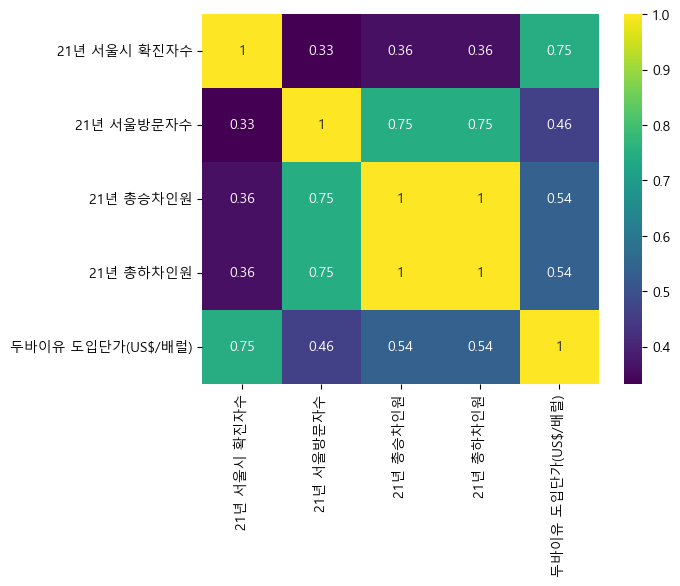

In [1077]:
sns.heatmap(df21.corr(), annot = True, cmap = 'viridis')

In [1078]:
%pwd

'C:\\Users\\SBAUser\\Jupyter_Python\\프로젝트 데이터분석'